# Self-Organizing Maps

## Importing the libraries

In [1]:
!pip install minisom

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

## Training the SOM

In [5]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results

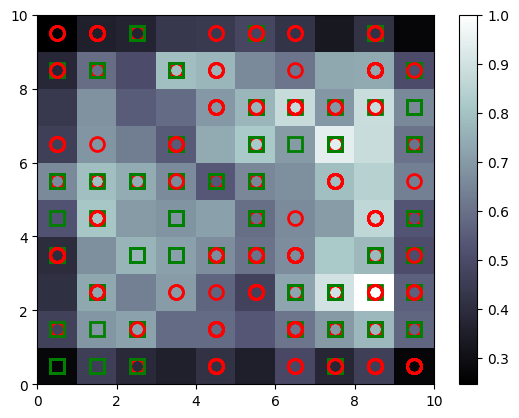

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds

In [7]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,9)]), axis = 0)
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5766183e+07 0.0000000e+00 2.4500000e+01 5.0000000e-01 2.0000000e+00
  1.1000000e+01 8.0000000e+00 1.5000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.8000000e+02 8.2500000e+02]
 [1.5772329e+07 0.0000000e+00 2.8080000e+01 1.5000000e+01 1.0000000e+00
  1.0000000e+01 9.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 1.3213000e+04]
 [1.5734649e+07 0.0000000e+00 4.0830000e+01 1.0000000e+01 2.0000000e+00
  1.1000000e+01 8.0000000e+00 1.7500000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.9000000e+01 8.3800000e+02]
 [1.5646082e+07 0.0000000e+00 1.8830000e+01 4.4150000e+00 1.0000000e+00
  8.0000000e+00 8.0000000e+00 3.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.4000000e+02 1.0000000e+00]
 [1.5717629e+07 0.0000000e+00 2.5170000e+01 2.8750000e+00 2.0000000e+00
  1.4000000e+01 8.0000000e+00 8.7500000e-01 1.0000000e+00 0.